In [370]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
plt.rcParams["figure.figsize"] = (20,10)

In [371]:
def getTasa(time,corpus_size):
    corpus_size_bits = corpus_size*8
    corpus_size_mb   = corpus_size/125000
    tasa_bits_secs   = corpus_size_bits/time
    tasa_bytes_secs  = corpus_size/time
    tasa_mb_secs     = corpus_size_mb/time
    return {'BITS/SEC':(corpus_size_bits,tasa_bits_secs),'BYTES/SEC':(corpus_size,tasa_bytes_secs),'MB/SEC':(corpus_size_mb,tasa_mb_secs)}
def getInfo(**kwargs):
    dfa              = kwargs.get('df') 
    time             = dfa.TIME.sum()/1000
    time_min         = time/60
    corpus_size      = dfa.FILE_SIZE.sum()
    tasas            = getTasa(time,corpus_size)
    tasa_bits_secs   = tasas['BITS/SEC']
    tasa_bytes_secs  = tasas['BYTES/SEC']
    tasa_mb_secs     = tasas['MB/SEC']
    keyLen           = dfa.KEY_LENGTH.unique()[0]
    cipher           = dfa.CIPHER.unique()[0]+"[{}]".format(keyLen)
    
    return (cipher,time,time_min,*tasa_bits_secs,*tasa_bytes_secs,*tasa_mb_secs)
    

In [382]:
df      = pd.read_csv('data.csv')
des     = df.loc[df.CIPHER=='DES']
desede  = df.loc[df.CIPHER=='DESede']
aes_128 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==128]
aes_192 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==192]
aes_256 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==256].loc[df.KDF!='PBKDF2WithHmacSHA384']
# 
aes_256_sha384 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==256].loc[df.KDF=='PBKDF2WithHmacSHA384']
df.loc[aes_256_sha384.index,'CIPHER']="AES_SHA384"
aes_256_sha384 = df.loc[df.CIPHER=='AES_SHA384'].loc[df.KEY_LENGTH==256].loc[df.KDF=='PBKDF2WithHmacSHA384']
# 
aes_256_sha512 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==256].loc[df.KDF=='PBKDF2WithHmacSHA512']
df.loc[aes_256_sha512.index,'CIPHER']="AES_SHA512"
aes_256_sha512 = df.loc[df.CIPHER=='AES_SHA512'].loc[df.KEY_LENGTH==256].loc[df.KDF=='PBKDF2WithHmacSHA512']
aes_256_sha512

,FILE_NAME,FILE_SIZE,TIME,KDF,CIPHER,TRANSFORMATION,KEY_LENGTH
7056,650.txt,1048575,294,PBKDF2WithHmacSHA512,AES_SHA512,AES/CBC/PKCS5Padding,256
7057,916.txt,1048575,107,PBKDF2WithHmacSHA512,AES_SHA512,AES/CBC/PKCS5Padding,256
7058,276.txt,1048575,84,PBKDF2WithHmacSHA512,AES_SHA512,AES/CBC/PKCS5Padding,256
7059,1483.txt,1048575,77,PBKDF2WithHmacSHA512,AES_SHA512,AES/CBC/PKCS5Padding,256
7060,1122.txt,1048575,61,PBKDF2WithHmacSHA512,AES_SHA512,AES/CBC/PKCS5Padding,256
...,...,...,...,...,...,...,...
8227,518.txt,1048575,48,PBKDF2WithHmacSHA512,AES_SHA512,AES/CBC/PKCS5Padding,256
8228,115.txt,1048575,47,PBKDF2WithHmacSHA512,AES_SHA512,AES/CBC/PKCS5Padding,256
8229,512.txt,1048575,49,PBKDF2WithHmacSHA512,AES_SHA512,AES/CBC/PKCS5Padding,256
8230,643.txt,1048575,48,PBKDF2WithHmacSHA512,AES_SHA512,AES/CBC/PKCS5Padding,256


# DES

In [292]:
des.head(5)

,FILE_NAME,FILE_SIZE,TIME,KDF,CIPHER,TRANSFORMATION,KEY_LENGTH
0,650.txt,1048575,381,PBKDF2WithHmacSHA1,DES,DES/CBC/PKCS5Padding,64
1,916.txt,1048575,131,PBKDF2WithHmacSHA1,DES,DES/CBC/PKCS5Padding,64
2,276.txt,1048575,102,PBKDF2WithHmacSHA1,DES,DES/CBC/PKCS5Padding,64
3,1483.txt,1048575,87,PBKDF2WithHmacSHA1,DES,DES/CBC/PKCS5Padding,64
4,1122.txt,1048575,87,PBKDF2WithHmacSHA1,DES,DES/CBC/PKCS5Padding,64


In [293]:
des_info =getInfo(df =des)
des_info

('DES[64]',
 202.504,
 3.3750666666666667,
 20665220656,
 102048456.60332637,
 2583152582,
 12756057.075415796,
 20665.220656,
 102.04845660332637)

# TRIPLE DES


In [294]:
desede.head(5)

,FILE_NAME,FILE_SIZE,TIME,KDF,CIPHER,TRANSFORMATION,KEY_LENGTH
1176,650.txt,1048575,476,PBKDF2WithHmacSHA256,DESede,DESede/CBC/PKCS5Padding,192
1177,916.txt,1048575,171,PBKDF2WithHmacSHA256,DESede,DESede/CBC/PKCS5Padding,192
1178,276.txt,1048575,150,PBKDF2WithHmacSHA256,DESede,DESede/CBC/PKCS5Padding,192
1179,1483.txt,1048575,146,PBKDF2WithHmacSHA256,DESede,DESede/CBC/PKCS5Padding,192
1180,1122.txt,1048575,147,PBKDF2WithHmacSHA256,DESede,DESede/CBC/PKCS5Padding,192


In [295]:
desede_info      = getInfo(df=desede)
desede_info

('DESede[192]',
 396.793,
 6.613216666666667,
 20665220656,
 52080607.91395009,
 2583152582,
 6510075.989243762,
 20665.220656,
 52.0806079139501)

# AES(128)

In [297]:
aes_128.head(5)

,FILE_NAME,FILE_SIZE,TIME,KDF,CIPHER,TRANSFORMATION,KEY_LENGTH
2352,650.txt,1048575,363,PBKDF2WithHmacSHA1,AES,AES/CBC/PKCS5Padding,128
2353,916.txt,1048575,110,PBKDF2WithHmacSHA1,AES,AES/CBC/PKCS5Padding,128
2354,276.txt,1048575,93,PBKDF2WithHmacSHA1,AES,AES/CBC/PKCS5Padding,128
2355,1483.txt,1048575,83,PBKDF2WithHmacSHA1,AES,AES/CBC/PKCS5Padding,128
2356,1122.txt,1048575,54,PBKDF2WithHmacSHA1,AES,AES/CBC/PKCS5Padding,128


In [298]:
aes_128info = getInfo(df=aes_128)
aes_128info

('AES[128]',
 122.4,
 2.04,
 20665220656,
 168833502.09150326,
 2583152582,
 21104187.761437908,
 20665.220656,
 168.83350209150328)

# AES(192)

In [299]:
aes_192.head(5)

,FILE_NAME,FILE_SIZE,TIME,KDF,CIPHER,TRANSFORMATION,KEY_LENGTH
3528,650.txt,1048575,370,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,192
3529,916.txt,1048575,108,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,192
3530,276.txt,1048575,66,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,192
3531,1483.txt,1048575,61,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,192
3532,1122.txt,1048575,58,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,192


In [300]:
aes_192info = getInfo(df=aes_192)
aes_192info 

('AES[192]',
 133.092,
 2.2182000000000004,
 20665220656,
 155270193.97108766,
 2583152582,
 19408774.246385958,
 20665.220656,
 155.27019397108765)

# AES(256)

In [301]:
aes_256.head(10)

,FILE_NAME,FILE_SIZE,TIME,KDF,CIPHER,TRANSFORMATION,KEY_LENGTH
4704,650.txt,1048575,375,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,256
4705,916.txt,1048575,113,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,256
4706,276.txt,1048575,90,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,256
4707,1483.txt,1048575,69,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,256
4708,1122.txt,1048575,64,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,256
4709,1061.txt,1048575,48,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,256
4710,1297.txt,1048575,49,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,256
4711,219.txt,1048575,53,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,256
4712,1067.txt,1048575,50,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,256
4713,760.txt,1048575,54,PBKDF2WithHmacSHA256,AES,AES/CBC/PKCS5Padding,256


In [302]:
aes_256info = getInfo(df=aes_256)
aes_256info 

('AES[256]',
 137.553,
 2.29255,
 20665220656,
 150234605.25033987,
 2583152582,
 18779325.656292483,
 20665.220656,
 150.23460525033988)

In [361]:
aes_256_sha384info = getInfo(df=aes_256_sha384)
aes_256_sha384info

('AES_SHA384[256]',
 140.4,
 2.3400000000000003,
 20665220656,
 147188181.3105413,
 2583152582,
 18398522.663817663,
 20665.220656,
 147.18818131054132)

In [383]:
aes_256_sha512info = getInfo(df=aes_256_sha512)
aes_256_sha512info

('AES_SHA512[256]',
 127.299,
 2.1216500000000003,
 20665220656,
 162336080.0634726,
 2583152582,
 20292010.007934075,
 20665.220656,
 162.33608006347262)

# RESULTADOS

In [384]:
info_df = pd.DataFrame([des_info,desede_info,aes_128info,aes_192info,aes_256info,aes_256_sha384info,aes_256_sha512info],columns=["CIPHER","TIME(SEC)","TIME(MIN)","SIZE(BITS)","TASA(BITS/SEC)","SIZE(BYTES)","TASA(BYTES/SEC)","SIZE(MB)","TASA(MB/SEC)"])
info_df = info_df.sort_values("TIME(SEC)",ascending=True)
info_df

,CIPHER,TIME(SEC),TIME(MIN),SIZE(BITS),TASA(BITS/SEC),SIZE(BYTES),TASA(BYTES/SEC),SIZE(MB),TASA(MB/SEC)
2,AES[128],122.400,2.040000,20665220656,1.688335e+08,2583152582,2.110419e+07,20665.220656,168.833502
6,AES_SHA512[256],127.299,2.121650,20665220656,1.623361e+08,2583152582,2.029201e+07,20665.220656,162.336080
3,AES[192],133.092,2.218200,20665220656,1.552702e+08,2583152582,1.940877e+07,20665.220656,155.270194
4,AES[256],137.553,2.292550,20665220656,1.502346e+08,2583152582,1.877933e+07,20665.220656,150.234605
5,AES_SHA384[256],140.400,2.340000,20665220656,1.471882e+08,2583152582,1.839852e+07,20665.220656,147.188181
0,DES[64],202.504,3.375067,20665220656,1.020485e+08,2583152582,1.275606e+07,20665.220656,102.048457
1,DESede[192],396.793,6.613217,20665220656,5.208061e+07,2583152582,6.510076e+06,20665.220656,52.080608


<AxesSubplot:xlabel='CIPHER', ylabel='TIME(SEC)'>

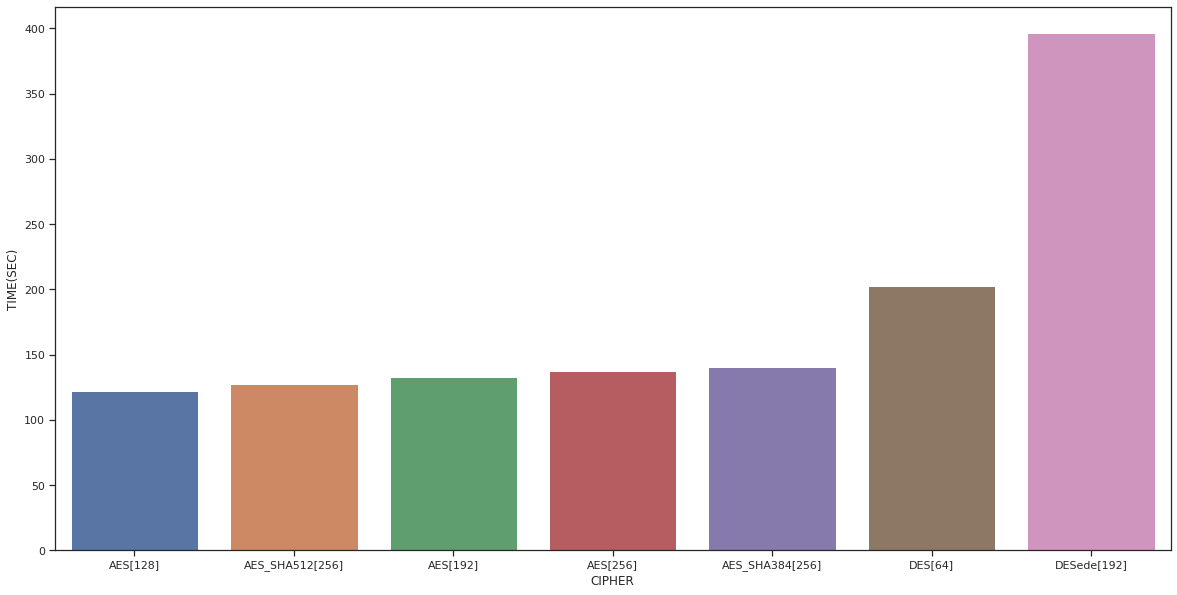

In [385]:
ciphers  = info_df.CIPHER
time_sec = info_df['TIME(SEC)']
sns.barplot(x="CIPHER",y="TIME(SEC)",data=info_df)

<AxesSubplot:xlabel='CIPHER', ylabel='TASA(BITS/SEC)'>

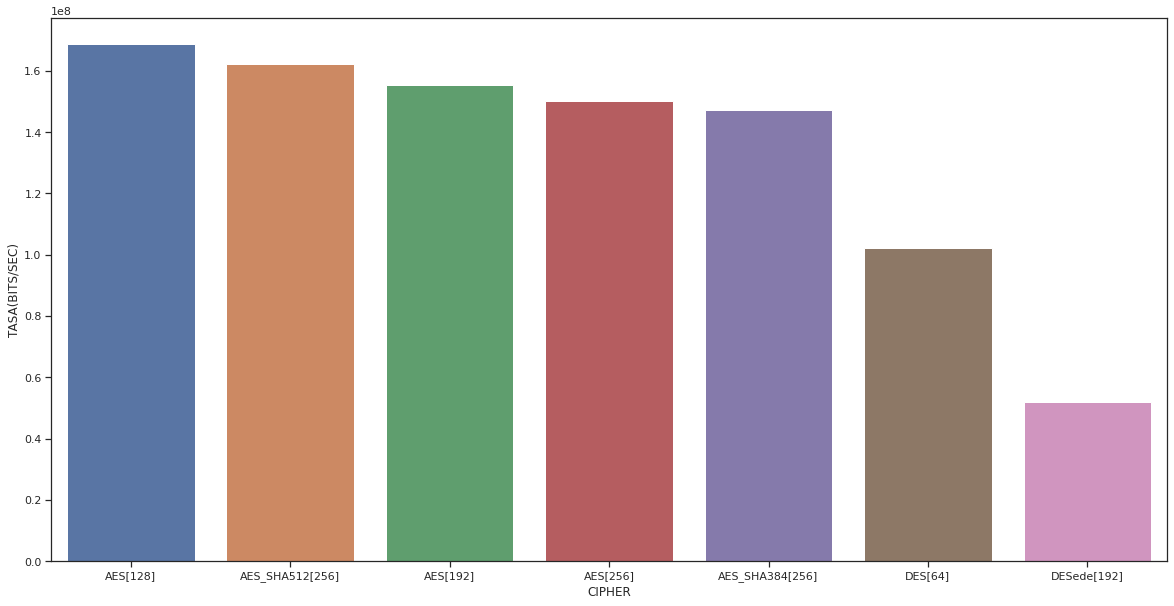

In [386]:
sns.barplot(x="CIPHER",y="TASA(BITS/SEC)",data=info_df)

<AxesSubplot:xlabel='CIPHER', ylabel='TASA(MB/SEC)'>

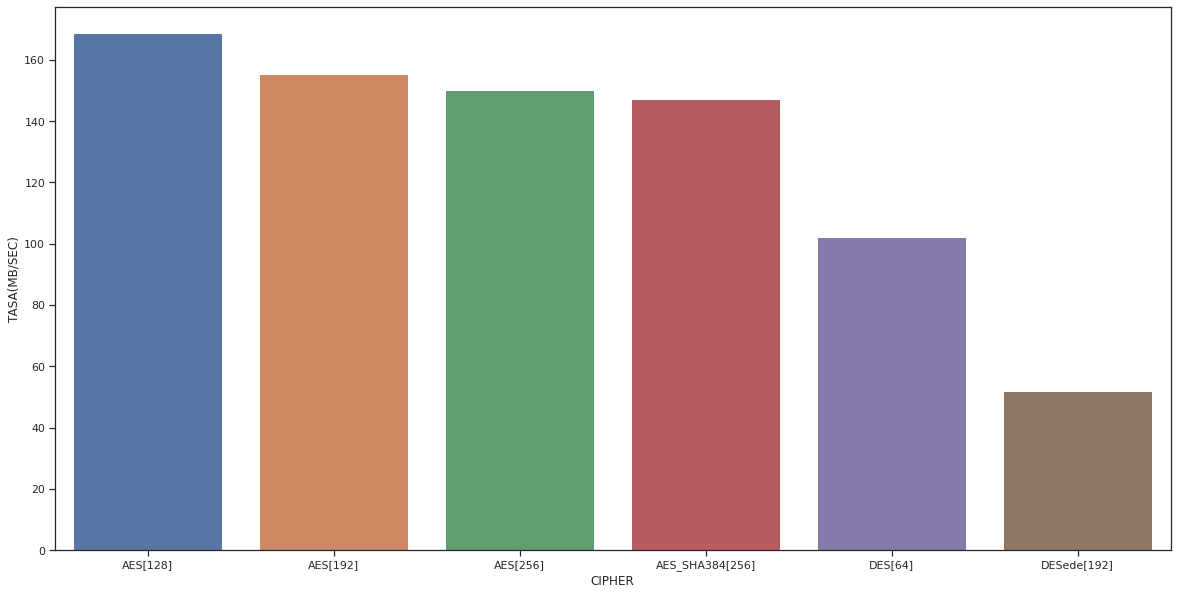

In [369]:

sns.barplot(x="CIPHER",y="TASA(MB/SEC)",data=info_df)